In [105]:
import numpy as np
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt
import seaborn as sn

In [187]:
def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn

conn = create_connection('Project.db')
sql_statement = "select * from Climate;"
df = pd.read_sql_query(sql_statement, conn)
display(df)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [188]:
df.info

<bound method DataFrame.info of                 dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1849-01-01              26.704                          1.435   
1       1849-02-01              27.434                          1.362   
2       1849-03-01              28.101                          1.612   
3       1849-04-01              26.140                          1.387   
4       1849-05-01              25.427                          1.200   
...            ...                 ...                            ...   
239172  2013-05-01              18.979                          0.807   
239173  2013-06-01              23.522                          0.647   
239174  2013-07-01              25.251                          1.042   
239175  2013-08-01              24.528                          0.840   
239176  2013-09-01                 NaN                            NaN   

           City        Country Latitude Longitude  
0       Abidjan  Côte D'Ivoire    5.63N

In [189]:
df.isnull().sum(axis=0)

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [190]:
df.describe(include= "all")

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
count,239177,228175.000000,228175.000000,239177,239177,239177,239177
unique,3239,NaN,NaN,100,49,49,93
top,1983-12-01,NaN,NaN,Rome,India,31.35N,31.38E
freq,100,NaN,NaN,3239,36582,13875,6801
mean,NaN,18.125969,0.969343,NaN,NaN,NaN,NaN
std,NaN,10.024800,0.979644,NaN,NaN,NaN,NaN
min,NaN,-26.772000,0.040000,NaN,NaN,NaN,NaN
25%,NaN,12.710000,0.340000,NaN,NaN,NaN,NaN
50%,NaN,20.428000,0.592000,NaN,NaN,NaN,NaN
75%,NaN,25.918000,1.320000,NaN,NaN,NaN,NaN


In [191]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

### UNIVARIATE ANALYSIS

<AxesSubplot:title={'center':'Freq dist of Country'}>

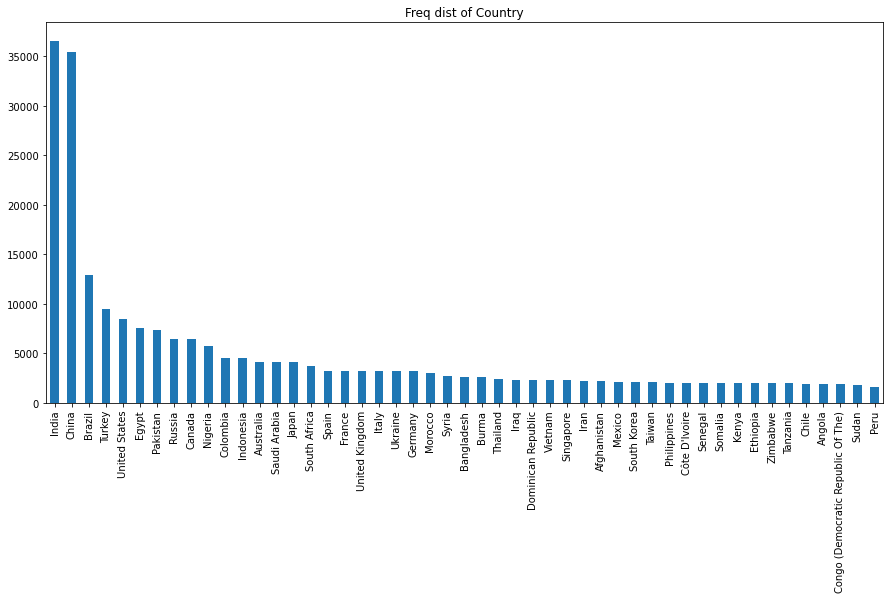

In [110]:
df['Country'].value_counts().plot.bar(figsize = (15,7), title="Freq dist of Country")

In [111]:
df['Country'].nunique()

49

<AxesSubplot:title={'center':'Freq dist of Major Cities'}>

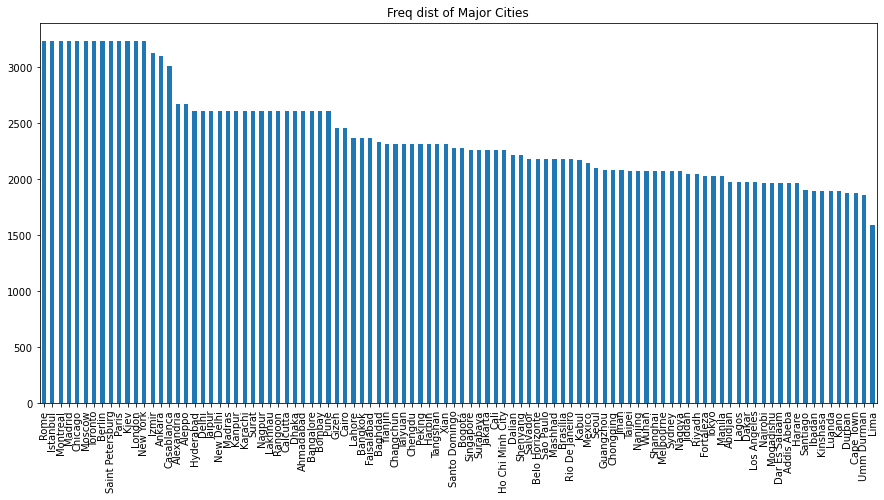

In [112]:
df['City'].value_counts().plot.bar(figsize = (15,7), title="Freq dist of Major Cities")

In [113]:
df['City'].nunique()

100

In [114]:
data = df

In [115]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [116]:
data['Year'] = data['dt'].apply(lambda x: x.split("-")[0])

In [117]:
data['month'] = data['dt'].apply(lambda x: x.split("-")[1])

In [118]:
import numpy as np
data['Season'] = np.where((data['month'] == '01') | (data['month'] == '02') | (data['month'] == '12'), "Winter", 0)
data['Season'] = np.where((data['month'] == '03') | (data['month'] == '04') | (data['month'] == '05'), "Spring", data['Season'])
data['Season'] = np.where((data['month'] == '06') | (data['month'] == '07') | (data['month'] == '08'), "Summer", data['Season'])
data['Season'] = np.where((data['month'] == '09') | (data['month'] == '10') | (data['month'] == '11'), "Fall", data['Season'])
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,month,Season
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,01,Winter
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,02,Winter
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,03,Spring
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,04,Spring
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,05,Spring


In [119]:
import numpy as np
data['Latitude'] = np.where((data['Latitude'].apply(lambda x: x[-1]) == 'N') , data['Latitude'].apply(lambda x: float(x[0:-1])) , data['Latitude'].apply(lambda x: -1 * float(x[0:-1])))
data['Longitude'] = np.where((data['Longitude'].apply(lambda x: x[-1]) == 'E' ), data['Longitude'].apply(lambda x: float(x[0:-1])), data['Longitude'].apply(lambda x: -1 * float(x[0:-1])))
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,month,Season
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23,1849,01,Winter
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23,1849,02,Winter
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23,1849,03,Spring
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23,1849,04,Spring
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23,1849,05,Spring


In [120]:
data.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                         float64
Longitude                        float64
Year                              object
month                             object
Season                            object
dtype: object

In [121]:
data['dt'] = pd.to_datetime(data['dt'], format = '%Y-%m-%d')

In [122]:
data.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                float64
Longitude                               float64
Year                                     object
month                                    object
Season                                   object
dtype: object

In [123]:
data = data.dropna()

In [185]:
data.shape

(228175, 8)

In [125]:
City = data['City']
Country = data['Country']
Latitude = data['Latitude']
Longitude = data['Longitude']
Season = data['Season']
Year = data['Year']
data1 = data['AverageTemperature'].groupby([City, Country, Latitude,Longitude, Season]).mean().reset_index(). \
      rename(columns={'AverageTemperature': 'Avg temp.'})
display(data1)

,City,Country,Latitude,Longitude,Season,Avg temp.
0,Abidjan,Côte D'Ivoire,5.63,-3.23,Fall,25.642779
1,Abidjan,Côte D'Ivoire,5.63,-3.23,Spring,27.397653
2,Abidjan,Côte D'Ivoire,5.63,-3.23,Summer,24.647040
3,Abidjan,Côte D'Ivoire,5.63,-3.23,Winter,26.960553
4,Addis Abeba,Ethiopia,8.84,38.11,Fall,16.744774
...,...,...,...,...,...,...
395,Wuhan,China,29.74,114.46,Winter,5.244809
396,Xian,China,34.56,108.97,Fall,11.344838
397,Xian,China,34.56,108.97,Spring,12.094857
398,Xian,China,34.56,108.97,Summer,23.397255


Text(0.5, 1.0, 'All Cities in the Dataset')

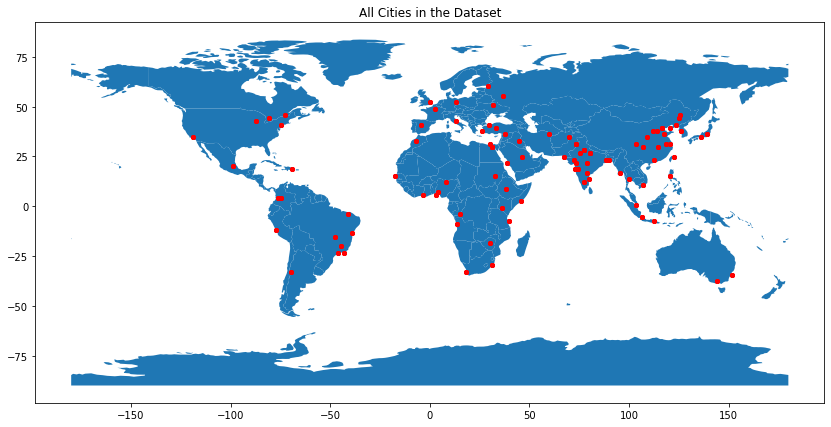

In [126]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(data1['Longitude'], data1['Latitude'])]
gdf = GeoDataFrame(data1, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 7)), marker='o', color='red', markersize=15)
plt.title("All Cities in the Dataset")

In [127]:
dataf = data1.loc[data1['Season'] == 'Fall']
dataf

,City,Country,Latitude,Longitude,Season,Avg temp.,geometry
0,Abidjan,Côte D'Ivoire,5.63,-3.23,Fall,25.642779,POINT (-3.23000 5.63000)
4,Addis Abeba,Ethiopia,8.84,38.11,Fall,16.744774,POINT (38.11000 8.84000)
8,Ahmadabad,India,23.31,72.52,Fall,26.372246,POINT (72.52000 23.31000)
12,Aleppo,Syria,36.17,37.79,Fall,18.953869,POINT (37.79000 36.17000)
16,Alexandria,Egypt,31.35,30.16,Fall,22.585122,POINT (30.16000 31.35000)
...,...,...,...,...,...,...,...
380,Tokyo,Japan,36.17,139.23,Fall,14.594200,POINT (139.23000 36.17000)
384,Toronto,Canada,44.20,-80.50,Fall,7.626756,POINT (-80.50000 44.20000)
388,Umm Durman,Sudan,15.27,32.50,Fall,30.061255,POINT (32.50000 15.27000)
392,Wuhan,China,29.74,114.46,Fall,17.977405,POINT (114.46000 29.74000)


Text(0.5, 1.0, 'Avg. temp. during Fall')

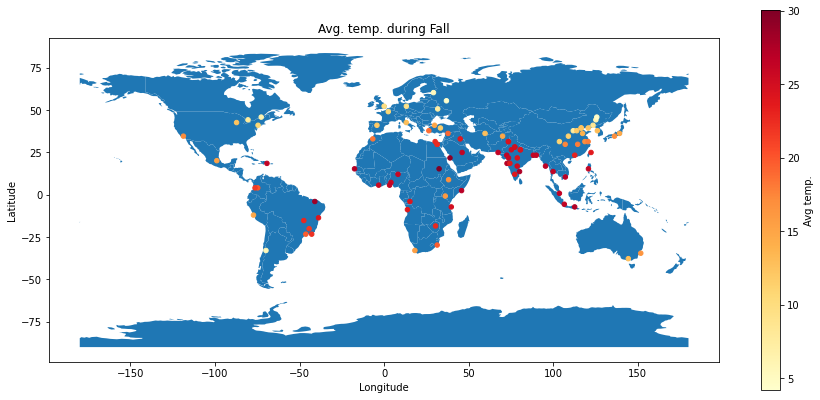

In [128]:
dataf.plot(ax =world.plot(figsize=(15, 7)), x="Longitude", y="Latitude", kind="scatter", c="Avg temp.",colormap="YlOrRd")
plt.title("Avg. temp. during Fall")

In [129]:
datas = data1.loc[data1['Season'] == 'Summer']
datas

,City,Country,Latitude,Longitude,Season,Avg temp.,geometry
2,Abidjan,Côte D'Ivoire,5.63,-3.23,Summer,24.647040,POINT (-3.23000 5.63000)
6,Addis Abeba,Ethiopia,8.84,38.11,Summer,16.935860,POINT (38.11000 8.84000)
10,Ahmadabad,India,23.31,72.52,Summer,29.272632,POINT (72.52000 23.31000)
14,Aleppo,Syria,36.17,37.79,Summer,27.987230,POINT (37.79000 36.17000)
18,Alexandria,Egypt,31.35,30.16,Summer,25.511447,POINT (30.16000 31.35000)
...,...,...,...,...,...,...,...
382,Tokyo,Japan,36.17,139.23,Summer,22.735817,POINT (139.23000 36.17000)
386,Toronto,Canada,44.20,-80.50,Summer,18.248061,POINT (-80.50000 44.20000)
390,Umm Durman,Sudan,15.27,32.50,Summer,31.710365,POINT (32.50000 15.27000)
394,Wuhan,China,29.74,114.46,Summer,27.801511,POINT (114.46000 29.74000)


Text(0.5, 1.0, 'Avg. temp. during Summer')

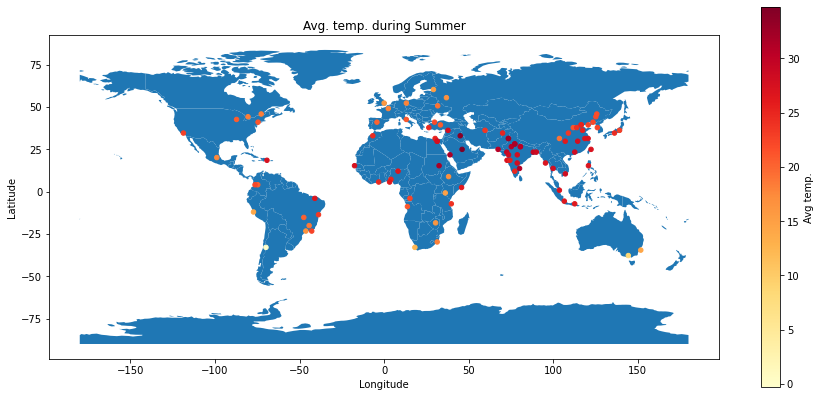

In [130]:
datas.plot(ax =world.plot(figsize=(15, 7)), x="Longitude", y="Latitude", kind="scatter", c="Avg temp.",colormap="YlOrRd")
plt.title("Avg. temp. during Summer")

In [131]:
datasp = data1.loc[data1['Season'] == 'Spring']
datasp

,City,Country,Latitude,Longitude,Season,Avg temp.,geometry
1,Abidjan,Côte D'Ivoire,5.63,-3.23,Spring,27.397653,POINT (-3.23000 5.63000)
5,Addis Abeba,Ethiopia,8.84,38.11,Spring,19.082145,POINT (38.11000 8.84000)
9,Ahmadabad,India,23.31,72.52,Spring,29.970094,POINT (72.52000 23.31000)
13,Aleppo,Syria,36.17,37.79,Spring,16.097708,POINT (37.79000 36.17000)
17,Alexandria,Egypt,31.35,30.16,Spring,18.509180,POINT (30.16000 31.35000)
...,...,...,...,...,...,...,...
381,Tokyo,Japan,36.17,139.23,Spring,10.624402,POINT (139.23000 36.17000)
385,Toronto,Canada,44.20,-80.50,Spring,4.325144,POINT (-80.50000 44.20000)
389,Umm Durman,Sudan,15.27,32.50,Spring,30.903484,POINT (32.50000 15.27000)
393,Wuhan,China,29.74,114.46,Spring,16.284355,POINT (114.46000 29.74000)


Text(0.5, 1.0, 'Avg. temp. during Spring')

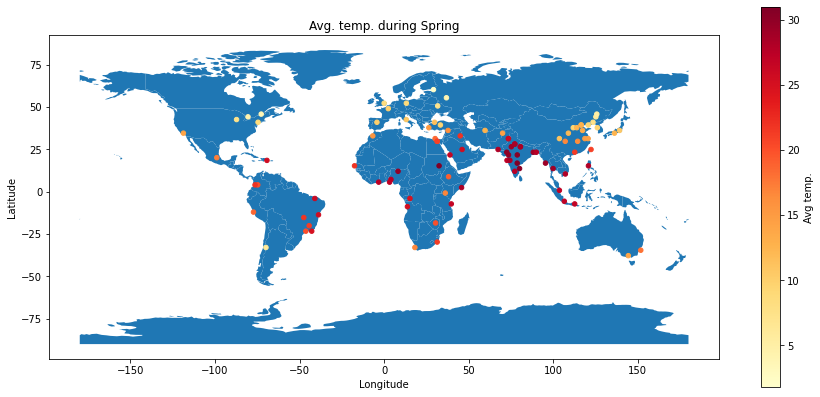

In [132]:
datasp.plot(ax =world.plot(figsize=(15, 7)), x="Longitude", y="Latitude", kind="scatter", c="Avg temp.",colormap="YlOrRd")
plt.title("Avg. temp. during Spring")

In [133]:
dataw = data1.loc[data1['Season'] == 'Winter']
dataw

,City,Country,Latitude,Longitude,Season,Avg temp.,geometry
3,Abidjan,Côte D'Ivoire,5.63,-3.23,Winter,26.960553,POINT (-3.23000 5.63000)
7,Addis Abeba,Ethiopia,8.84,38.11,Winter,17.338024,POINT (38.11000 8.84000)
11,Ahmadabad,India,23.31,72.52,Winter,20.512321,POINT (72.52000 23.31000)
15,Aleppo,Syria,36.17,37.79,Winter,6.406682,POINT (37.79000 36.17000)
19,Alexandria,Egypt,31.35,30.16,Winter,14.624713,POINT (30.16000 31.35000)
...,...,...,...,...,...,...,...
383,Tokyo,Japan,36.17,139.23,Winter,2.212810,POINT (139.23000 36.17000)
387,Toronto,Canada,44.20,-80.50,Winter,-6.968914,POINT (-80.50000 44.20000)
391,Umm Durman,Sudan,15.27,32.50,Winter,23.678860,POINT (32.50000 15.27000)
395,Wuhan,China,29.74,114.46,Winter,5.244809,POINT (114.46000 29.74000)


Text(0.5, 1.0, 'Avg. temp. during Winter')

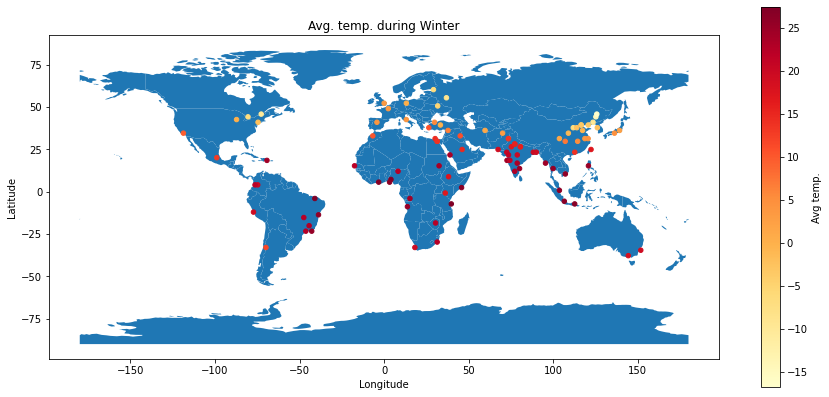

In [134]:
dataw.plot(ax =world.plot(figsize=(15, 7)), x="Longitude", y="Latitude", kind="scatter", c="Avg temp.",colormap="YlOrRd")
plt.title("Avg. temp. during Winter")

In [135]:
data2 = data['AverageTemperature'].groupby([City, Country, Year, Latitude, Longitude, Season]).mean().reset_index(). \
      rename(columns={'AverageTemperature': 'Avg temp.'})
display(data2)

,City,Country,Year,Latitude,Longitude,Season,Avg temp.
0,Abidjan,Côte D'Ivoire,1849,5.63,-3.23,Fall,25.085667
1,Abidjan,Côte D'Ivoire,1849,5.63,-3.23,Spring,26.556000
2,Abidjan,Côte D'Ivoire,1849,5.63,-3.23,Summer,24.159333
3,Abidjan,Côte D'Ivoire,1849,5.63,-3.23,Winter,26.529333
4,Abidjan,Côte D'Ivoire,1850,5.63,-3.23,Fall,24.677667
...,...,...,...,...,...,...,...
76466,Xian,China,2012,34.56,108.97,Summer,23.770667
76467,Xian,China,2012,34.56,108.97,Winter,-1.025333
76468,Xian,China,2013,34.56,108.97,Spring,13.884000
76469,Xian,China,2013,34.56,108.97,Summer,24.433667


In [136]:
Avgtemp = data2['Avg temp.']
data3 = data['Year'].groupby([City, Season]).max().reset_index().rename(columns={'Year': 'Last Recorded Year'})
display(data3)

,City,Season,Last Recorded Year
0,Abidjan,Fall,2012
1,Abidjan,Spring,2013
2,Abidjan,Summer,2013
3,Abidjan,Winter,2013
4,Addis Abeba,Fall,2012
...,...,...,...
395,Wuhan,Winter,2013
396,Xian,Fall,2012
397,Xian,Spring,2013
398,Xian,Summer,2013


In [137]:
data4 = data['Year'].groupby([City, Season]).min().reset_index().rename(columns={'Year': 'First Recorded Year'})
display(data4)

,City,Season,First Recorded Year
0,Abidjan,Fall,1849
1,Abidjan,Spring,1849
2,Abidjan,Summer,1849
3,Abidjan,Winter,1849
4,Addis Abeba,Fall,1850
...,...,...,...
395,Wuhan,Winter,1841
396,Xian,Fall,1820
397,Xian,Spring,1821
398,Xian,Summer,1820


In [138]:
df3 = pd.merge(data2, data3, how='inner', left_on=['City','Season', 'Year'] , right_on=['City','Season','Last Recorded Year'])
df3

,City,Country,Year,Latitude,Longitude,Season,Avg temp.,Last Recorded Year
0,Abidjan,Côte D'Ivoire,2012,5.63,-3.23,Fall,26.563333,2012
1,Abidjan,Côte D'Ivoire,2013,5.63,-3.23,Spring,28.469000,2013
2,Abidjan,Côte D'Ivoire,2013,5.63,-3.23,Summer,25.216333,2013
3,Abidjan,Côte D'Ivoire,2013,5.63,-3.23,Winter,28.386000,2013
4,Addis Abeba,Ethiopia,2012,8.84,38.11,Fall,17.823667,2012
...,...,...,...,...,...,...,...,...
395,Wuhan,China,2013,29.74,114.46,Winter,5.705000,2013
396,Xian,China,2012,34.56,108.97,Fall,11.387667,2012
397,Xian,China,2013,34.56,108.97,Spring,13.884000,2013
398,Xian,China,2013,34.56,108.97,Summer,24.433667,2013


In [139]:
df4 = pd.merge(data2, data4, how='inner', left_on=['City','Season', 'Year'] , right_on=['City','Season','First Recorded Year'])
df4

,City,Country,Year,Latitude,Longitude,Season,Avg temp.,First Recorded Year
0,Abidjan,Côte D'Ivoire,1849,5.63,-3.23,Fall,25.085667,1849
1,Abidjan,Côte D'Ivoire,1849,5.63,-3.23,Spring,26.556000,1849
2,Abidjan,Côte D'Ivoire,1849,5.63,-3.23,Summer,24.159333,1849
3,Abidjan,Côte D'Ivoire,1849,5.63,-3.23,Winter,26.529333,1849
4,Addis Abeba,Ethiopia,1850,8.84,38.11,Fall,15.642000,1850
...,...,...,...,...,...,...,...,...
395,Wuhan,China,1841,29.74,114.46,Winter,4.304333,1841
396,Xian,China,1820,34.56,108.97,Fall,9.950000,1820
397,Xian,China,1820,34.56,108.97,Summer,20.683000,1820
398,Xian,China,1820,34.56,108.97,Winter,-2.781000,1820


In [140]:
df5 = [df3, df4]
df5 = pd.concat(df5, ignore_index = True, sort = False)
df5 = df5.sort_values(by = ['City', 'Season', 'Year']).reset_index()
df5 = df5.drop(columns = ['index', 'Last Recorded Year', 'First Recorded Year'])
City = df5['City']
Season = df5['Season']
data5 = df5['Avg temp.'].groupby([City, Season]).diff().reset_index().rename(columns = {'Avg temp.' : 'Temp. Diff.'})
data5

,index,Temp. Diff.
0,0,NaN
1,1,1.477667
2,2,NaN
3,3,1.913000
4,4,NaN
...,...,...
795,795,1.894333
796,796,NaN
797,797,3.750667
798,798,NaN


In [141]:
df6 = pd.merge(df5, data5, how='inner', left_index=True , right_on=['index'])
df6.drop(columns = ['index'], inplace = True)
df6.dropna(inplace = True)
df6 = df6.reset_index()
df6 = df6.drop(columns = ['index', 'Year', 'Avg temp.'])
df6

,City,Country,Latitude,Longitude,Season,Temp. Diff.
0,Abidjan,Côte D'Ivoire,5.63,-3.23,Fall,1.477667
1,Abidjan,Côte D'Ivoire,5.63,-3.23,Spring,1.913000
2,Abidjan,Côte D'Ivoire,5.63,-3.23,Summer,1.057000
3,Abidjan,Côte D'Ivoire,5.63,-3.23,Winter,1.856667
4,Addis Abeba,Ethiopia,8.84,38.11,Fall,2.181667
...,...,...,...,...,...,...
395,Wuhan,China,29.74,114.46,Winter,1.400667
396,Xian,China,34.56,108.97,Fall,1.437667
397,Xian,China,34.56,108.97,Spring,1.894333
398,Xian,China,34.56,108.97,Summer,3.750667


In [142]:
datatf = df6.loc[df6['Season'] == 'Fall']
datatf

,City,Country,Latitude,Longitude,Season,Temp. Diff.
0,Abidjan,Côte D'Ivoire,5.63,-3.23,Fall,1.477667
4,Addis Abeba,Ethiopia,8.84,38.11,Fall,2.181667
8,Ahmadabad,India,23.31,72.52,Fall,0.466000
12,Aleppo,Syria,36.17,37.79,Fall,2.111333
16,Alexandria,Egypt,31.35,30.16,Fall,1.998667
...,...,...,...,...,...,...
380,Tokyo,Japan,36.17,139.23,Fall,2.688667
384,Toronto,Canada,44.20,-80.50,Fall,14.705000
388,Umm Durman,Sudan,15.27,32.50,Fall,1.621333
392,Wuhan,China,29.74,114.46,Fall,0.824667


Text(0.5, 1.0, 'Climate Change during Fall')

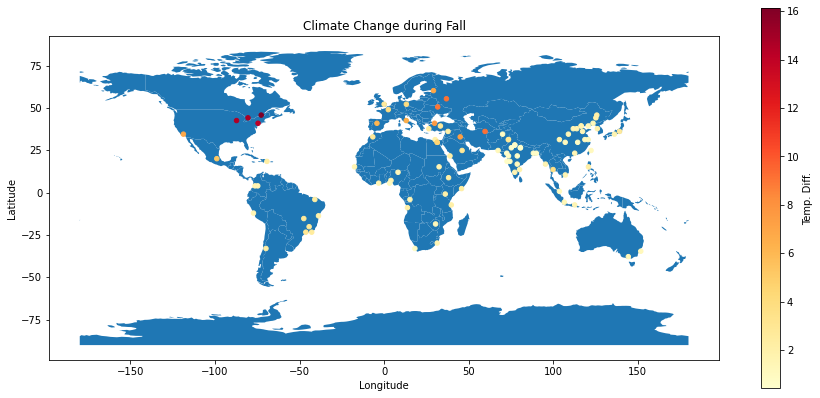

In [143]:
datatf.plot(ax =world.plot(figsize=(15, 7)), x="Longitude", y="Latitude", kind="scatter", c="Temp. Diff.",colormap="YlOrRd")
plt.title("Climate Change during Fall")

In [144]:
datats = df6.loc[df6['Season'] == 'Summer']
datats

,City,Country,Latitude,Longitude,Season,Temp. Diff.
2,Abidjan,Côte D'Ivoire,5.63,-3.23,Summer,1.057000
6,Addis Abeba,Ethiopia,8.84,38.11,Summer,1.966333
10,Ahmadabad,India,23.31,72.52,Summer,-0.684667
14,Aleppo,Syria,36.17,37.79,Summer,0.983667
18,Alexandria,Egypt,31.35,30.16,Summer,0.947333
...,...,...,...,...,...,...
382,Tokyo,Japan,36.17,139.23,Summer,1.450333
386,Toronto,Canada,44.20,-80.50,Summer,0.288833
390,Umm Durman,Sudan,15.27,32.50,Summer,2.431833
394,Wuhan,China,29.74,114.46,Summer,2.667333


Text(0.5, 1.0, 'Climate Change during Summer')

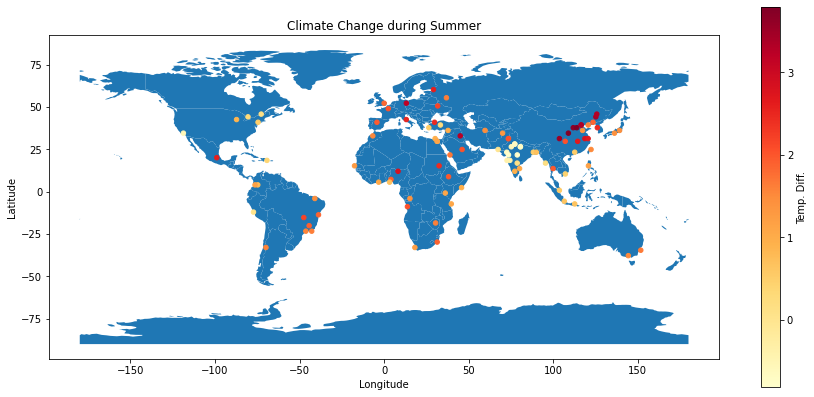

In [145]:
datats.plot(ax =world.plot(figsize=(15, 7)), x="Longitude", y="Latitude", kind="scatter", c="Temp. Diff.",colormap="YlOrRd")
plt.title("Climate Change during Summer")

In [146]:
datatsp = df6.loc[df6['Season'] == 'Spring']
datatsp

,City,Country,Latitude,Longitude,Season,Temp. Diff.
1,Abidjan,Côte D'Ivoire,5.63,-3.23,Spring,1.913000
5,Addis Abeba,Ethiopia,8.84,38.11,Spring,2.419333
9,Ahmadabad,India,23.31,72.52,Spring,1.113667
13,Aleppo,Syria,36.17,37.79,Spring,-3.242667
17,Alexandria,Egypt,31.35,30.16,Spring,-0.360333
...,...,...,...,...,...,...
381,Tokyo,Japan,36.17,139.23,Spring,1.812000
385,Toronto,Canada,44.20,-80.50,Spring,-3.433333
389,Umm Durman,Sudan,15.27,32.50,Spring,0.518667
393,Wuhan,China,29.74,114.46,Spring,2.946000


Text(0.5, 1.0, 'Climate Change during Spring')

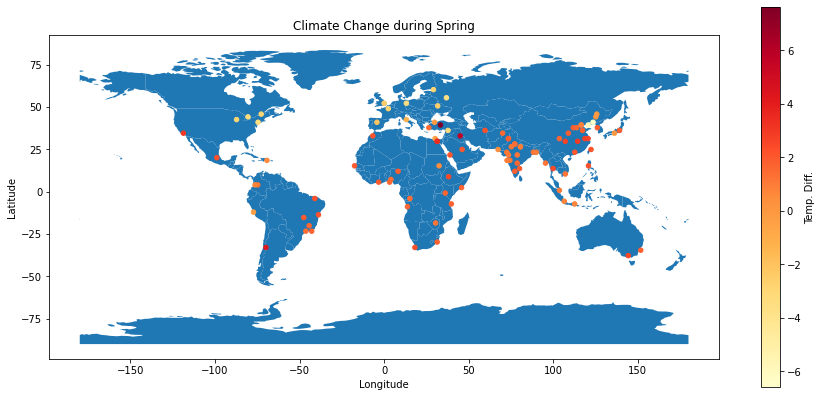

In [147]:
datatsp.plot(ax =world.plot(figsize=(15, 7)), x="Longitude", y="Latitude", kind="scatter", c="Temp. Diff.",colormap="YlOrRd")
plt.title("Climate Change during Spring")

In [148]:
datatw = df6.loc[df6['Season'] == 'Winter']
datatw

,City,Country,Latitude,Longitude,Season,Temp. Diff.
3,Abidjan,Côte D'Ivoire,5.63,-3.23,Winter,1.856667
7,Addis Abeba,Ethiopia,8.84,38.11,Winter,2.284000
11,Ahmadabad,India,23.31,72.52,Winter,1.238167
15,Aleppo,Syria,36.17,37.79,Winter,0.272500
19,Alexandria,Egypt,31.35,30.16,Winter,-0.690000
...,...,...,...,...,...,...
383,Tokyo,Japan,36.17,139.23,Winter,-0.185667
387,Toronto,Canada,44.20,-80.50,Winter,0.520000
391,Umm Durman,Sudan,15.27,32.50,Winter,3.338000
395,Wuhan,China,29.74,114.46,Winter,1.400667


Text(0.5, 1.0, 'Climate Change during Winter')

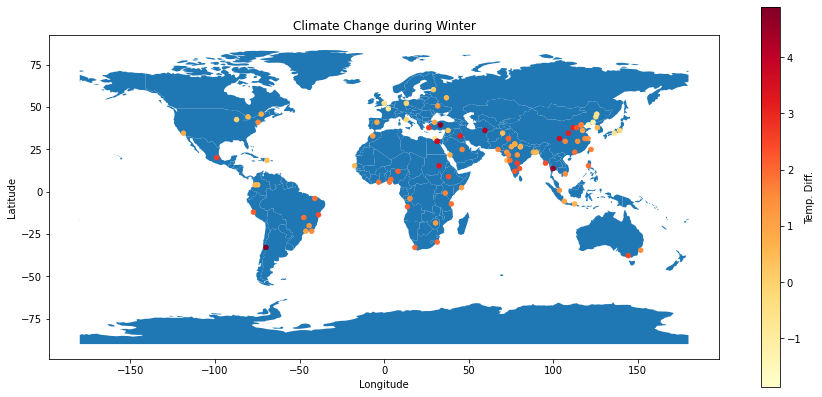

In [149]:
datatw.plot(ax =world.plot(figsize=(15, 7)), x="Longitude", y="Latitude", kind="scatter", c="Temp. Diff.",colormap="YlOrRd")
plt.title("Climate Change during Winter")

In [150]:
data.drop(columns = ['Year', 'month'], inplace = True)

C:\Users\revuk\anaconda3\envs\my_env\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [151]:
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Season
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23,Winter
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23,Winter
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23,Spring
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23,Spring
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23,Spring
...,...,...,...,...,...,...,...,...
239171,2013-04-01,12.563,1.823,Xian,China,34.56,108.97,Spring
239172,2013-05-01,18.979,0.807,Xian,China,34.56,108.97,Spring
239173,2013-06-01,23.522,0.647,Xian,China,34.56,108.97,Summer
239174,2013-07-01,25.251,1.042,Xian,China,34.56,108.97,Summer


In [152]:
import datetime as dt
data['dt']=data['dt'].map(dt.datetime.toordinal)

C:\Users\revuk\AppData\Local\Temp/ipykernel_1080/3181180689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dt']=data['dt'].map(dt.datetime.toordinal)


In [153]:
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Season
0,674969,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23,Winter
1,675000,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23,Winter
2,675028,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23,Spring
3,675059,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23,Spring
4,675089,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23,Spring
...,...,...,...,...,...,...,...,...
239171,734959,12.563,1.823,Xian,China,34.56,108.97,Spring
239172,734989,18.979,0.807,Xian,China,34.56,108.97,Spring
239173,735020,23.522,0.647,Xian,China,34.56,108.97,Summer
239174,735050,25.251,1.042,Xian,China,34.56,108.97,Summer


In [154]:
from sklearn.preprocessing import LabelEncoder
City_labelencoder = LabelEncoder()
data["City"] = City_labelencoder.fit_transform(data["City"])

C:\Users\revuk\AppData\Local\Temp/ipykernel_1080/162725885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["City"] = City_labelencoder.fit_transform(data["City"])


In [155]:
from sklearn.preprocessing import LabelEncoder
Country_labelencoder = LabelEncoder()
data["Country"] = Country_labelencoder.fit_transform(data["Country"])

C:\Users\revuk\AppData\Local\Temp/ipykernel_1080/874886282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Country"] = Country_labelencoder.fit_transform(data["Country"])


In [156]:
from sklearn.preprocessing import LabelEncoder
Country_labelencoder = LabelEncoder()
data["Season"] = Country_labelencoder.fit_transform(data["Season"])

C:\Users\revuk\AppData\Local\Temp/ipykernel_1080/1837802117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Season"] = Country_labelencoder.fit_transform(data["Season"])


In [157]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Season
0,674969,26.704,1.435,0,11,5.63,-3.23,3
1,675000,27.434,1.362,0,11,5.63,-3.23,3
2,675028,28.101,1.612,0,11,5.63,-3.23,1
3,675059,26.140,1.387,0,11,5.63,-3.23,1
4,675089,25.427,1.200,0,11,5.63,-3.23,1


In [158]:
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [159]:
X = data.drop(columns = ['AverageTemperature', 'AverageTemperatureUncertainty']).iloc[:, 0:].values
y = data.iloc[:, 1:3].values

In [160]:
X

array([[ 6.74969e+05,  0.00000e+00,  1.10000e+01,  5.63000e+00,
        -3.23000e+00,  3.00000e+00],
       [ 6.75000e+05,  0.00000e+00,  1.10000e+01,  5.63000e+00,
        -3.23000e+00,  3.00000e+00],
       [ 6.75028e+05,  0.00000e+00,  1.10000e+01,  5.63000e+00,
        -3.23000e+00,  1.00000e+00],
       ...,
       [ 7.35020e+05,  9.90000e+01,  8.00000e+00,  3.45600e+01,
         1.08970e+02,  2.00000e+00],
       [ 7.35050e+05,  9.90000e+01,  8.00000e+00,  3.45600e+01,
         1.08970e+02,  2.00000e+00],
       [ 7.35081e+05,  9.90000e+01,  8.00000e+00,  3.45600e+01,
         1.08970e+02,  2.00000e+00]])

In [174]:
X.shape

(228175, 6)

In [161]:
y

array([[26.704,  1.435],
       [27.434,  1.362],
       [28.101,  1.612],
       ...,
       [23.522,  0.647],
       [25.251,  1.042],
       [24.528,  0.84 ]])

In [175]:
y.shape

(228175, 2)

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state = 1)

In [176]:
X_train.shape

(182540, 6)

In [177]:
X_test.shape

(45635, 6)

In [178]:
y_train.shape

(182540, 2)

In [179]:
y_test.shape

(45635, 2)

### MULTIOUTPUT REGRESSION MODEL

In [192]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [193]:
mregpred=regressor.predict(X_test)
mregpred

array([[20.4801029 ,  0.60577908],
       [16.83793096,  0.92530427],
       [20.68873779,  1.06503606],
       ...,
       [21.80886081,  0.24228274],
       [21.68642502,  1.45915431],
       [14.03157645,  0.35791219]])

In [194]:
r2_score(y_test, mregpred)

0.40303248195919555

In [195]:
regressor.coef_

array([[ 2.55268642e-05, -4.93844107e-02,  6.04490845e-02,
        -1.83652882e-01,  2.36196538e-02, -1.59762214e+00],
       [-3.17293676e-05,  2.87425534e-04,  6.84606806e-04,
         1.50079637e-03, -6.67427020e-04,  5.56662770e-02]])

In [167]:
regressor.intercept_

array([ 7.07008416, 23.02404805])

### KNN

In [168]:
from sklearn.neighbors import KNeighborsRegressor
knnmodel = KNeighborsRegressor()
knnmodel.fit(X_train,y_train)

KNeighborsRegressor()

In [169]:
knnpred = knnmodel.predict(X_test)

In [182]:
r2_score(y_test, knnpred)

0.8214560619265133

### DECISON TREE

In [171]:
from sklearn.tree import DecisionTreeRegressor
dtmodel = DecisionTreeRegressor()
dtmodel.fit(X_train,y_train)

DecisionTreeRegressor()

In [172]:
dtpred = dtmodel.predict(X_test)

In [184]:
r2_score(y_test, dtpred)

0.7798475659377229